# Matplotlib 


# 1. Pyplot

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Simples Graphs

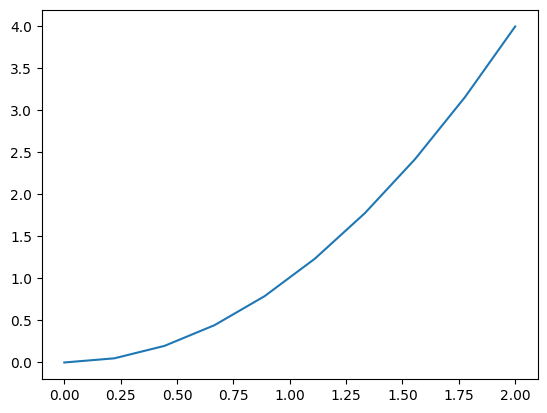

In [9]:
X = np.linspace(0, 2, 10)
y = X**2

plt.plot(X, y)
plt.show()

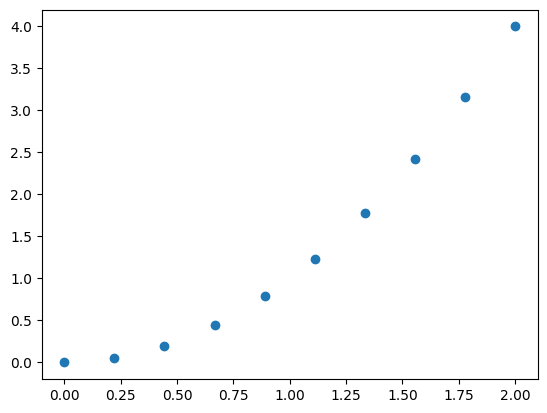

In [10]:

plt.scatter(X, y)
plt.show()

# Styles Graphiques
Il existe beaucoup de styles a ajouter aux graphiques. Voici les plus importants a retenir :

- c : couleur de la ligne
- lw : epaisseur de la ligne (pour les graphiques plot)
- ls : style de la ligne (pour les graphiques plot)
- size : taille du point (pour les graphiques scatter)
- marker : style de points (pour les graphiques scatter)
- alpha : transparence du graphique

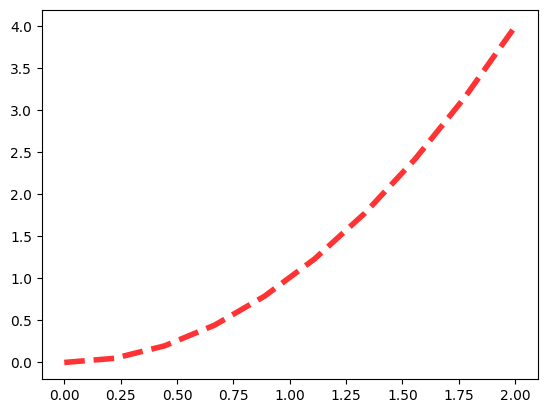

In [11]:
plt.plot(X, y, c='red', lw=4, ls='--', alpha=0.8)
plt.show()

## 2. Cycle de vie d'une figure
Pour créer des figures proprements, on doit suivre le cycle de vie suivant :

1. plt.figure(figsize())
2. plt.plot()
3. Extras (titre, axes, legendes)
4. plt.show()

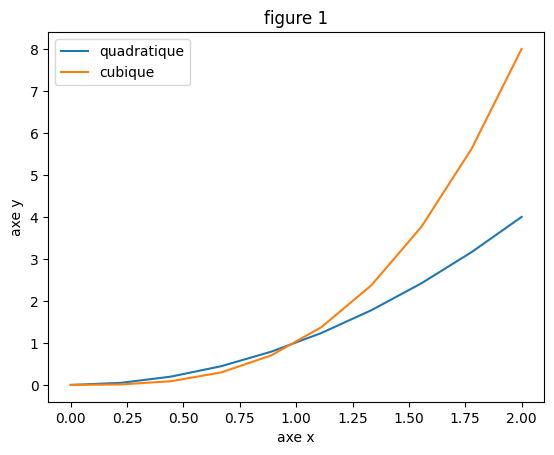

In [12]:
X = np.linspace(0, 2, 10)

plt.figure() # Création d'une figure
plt.plot(X, X**2, label='quadratique') # premiere courbe
plt.plot(X, X**3, label='cubxsique') # deuxieme courbe
# Extra information
plt.title('figure 1') # titre
plt.xlabel('axe x') # axes
plt.ylabel('axe y') # axes
plt.legend() # legend

plt.savefig('figure.png') # sauvegarde la figure dans le repertoire de travail
plt.show() # affiche la figure

## 3. Subplots
Les subplots sont un autre éléments a ajouter pour créer plusieurs graphiques sur une meme figure



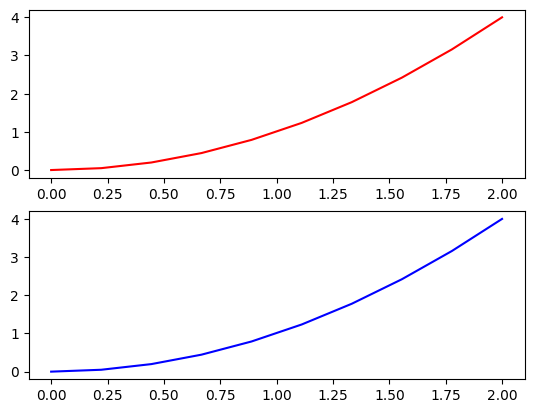

In [14]:
plt.subplot(2, 1, 1)
plt.plot(X, y, c='red')
plt.subplot(2, 1, 2)
plt.plot(X, y, c='blue')

## 4. Méthode orientée objet

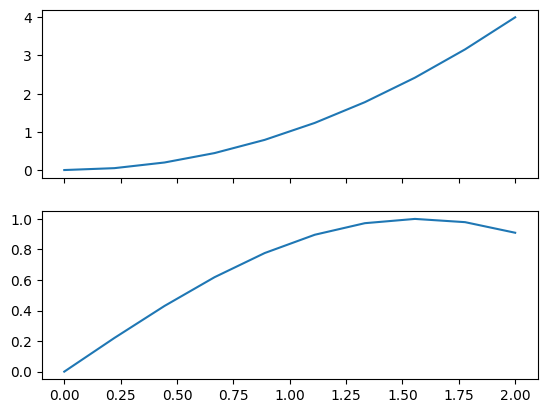

In [18]:
fig, ax = plt.subplots(2, 1, sharex=True) # partage le meme axe pour les subplots
ax[0].plot(X, y)
ax[1].plot(X, np.sin(X))
plt.show()

# Practice

Créez une fonction "graphique" qui permet de tracer sur une seule et meme figure une série de graphiques issue d'un dictionnaire contenant plusieurs datasets :

In [21]:
dataset = {f"experience{i}": np.random.randn(100) for i in range(4)}

dataset

{'experience0': array([-0.25779589, -0.16612958,  1.32488087, -0.10745806,  0.39694231,
        -0.87432303,  0.21764752, -0.75107066, -0.62615846, -1.1846388 ,
         0.15555921,  0.38879492, -0.52557816,  0.26122486,  0.49054413,
         1.03360769,  0.77456648,  0.85030348, -1.02160228, -1.38809599,
         0.93503741, -0.49339078,  0.40925166, -0.20930581, -0.29663287,
         0.52557746,  0.09004219,  1.68506418, -0.56409136,  0.04787498,
        -0.54004875,  1.44294942,  1.10925463, -0.15469167, -0.93313702,
         1.36202109,  0.69831236,  0.51632009, -0.14458546, -0.37205956,
        -1.59310707, -1.32867243,  0.51254684, -0.89590028, -0.67159111,
        -0.42984344, -1.34210919,  0.00966322,  1.89265282, -0.36501258,
         0.75257712, -0.8259386 , -1.4403399 ,  1.31837447, -0.8246902 ,
         0.2929225 ,  0.82386656,  2.5392269 ,  1.17190893, -2.52148827,
         1.94126987, -0.86803418, -1.45955863, -0.07570686, -1.35263685,
        -0.77628403,  0.78629685, -2

In [20]:
def graphique(data):
    n = len(data)
    plt.figure(figsize=(12, 20))
    
    for k, i in zip(data.keys(), range(1, n+1)):
        plt.subplot(n, 1, i)
        plt.plot(data[k])
        plt.title(k)
        
    plt.show()

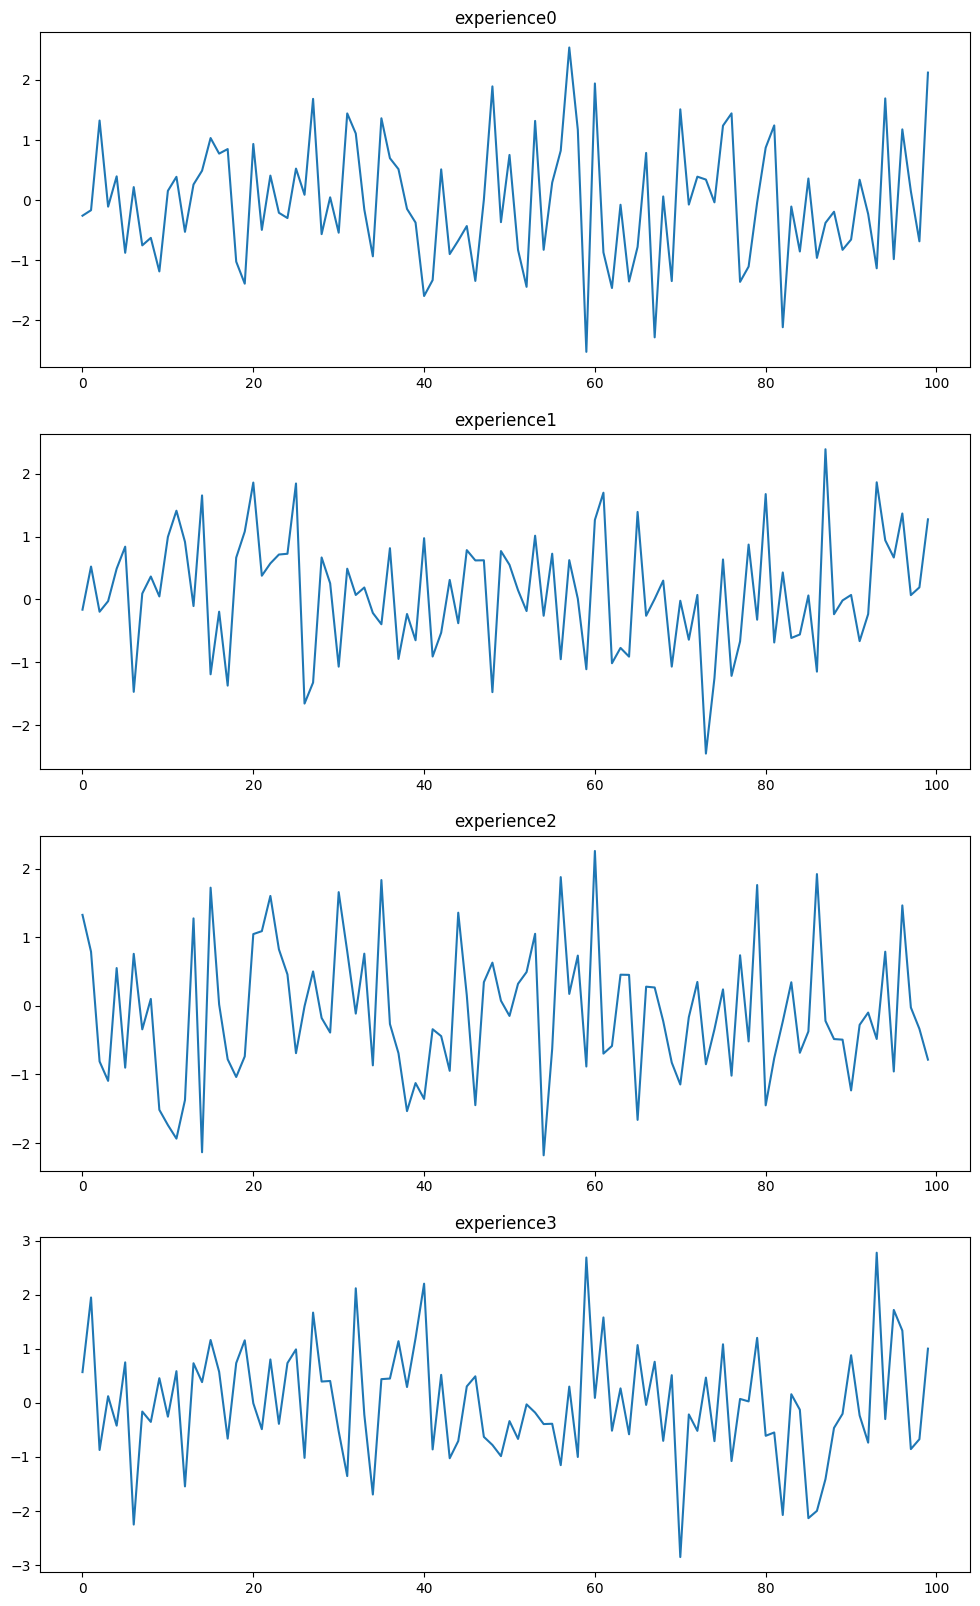

In [22]:
graphique(dataset)

# Matplotlib Top Graphiques

## 1.Graphique de Classification avec Scatter()


In [23]:

from sklearn.datasets import load_iris

In [24]:
iris = load_iris()
x = iris.data
y = iris.target

print(f'x contient {x.shape[0]} exmples et {x.shape[1]} variables')
print(f'il y a {np.unique(y).size} classes')

x contient 150 exmples et 4 variables
il y a 3 classes


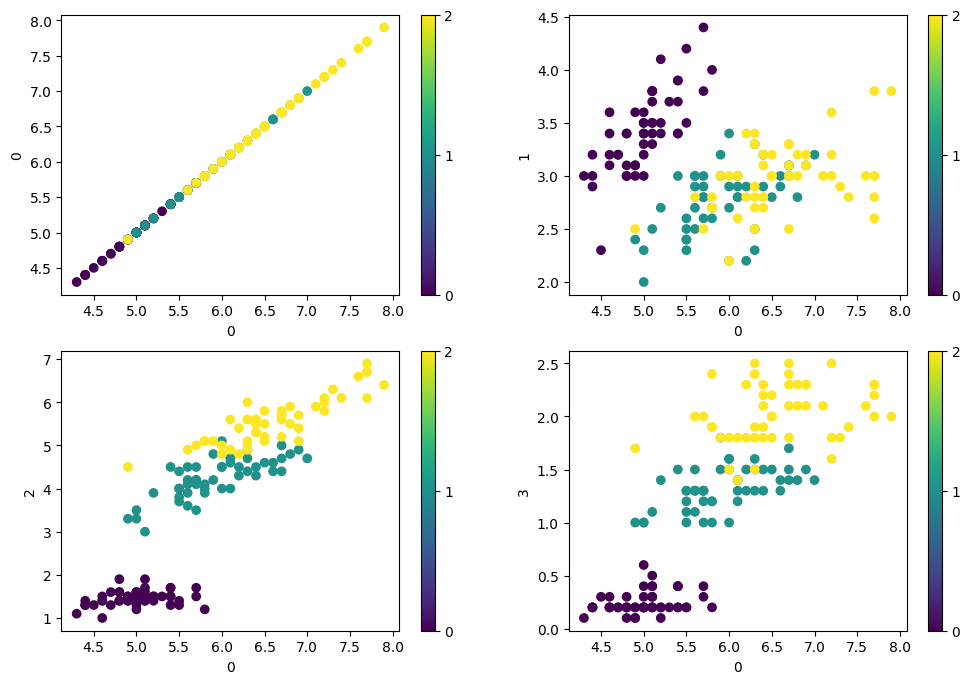

In [25]:
n = x.shape[1]
plt.figure(figsize=(12, 8))
for i in range(n):
    plt.subplot(n//2, n//2, i+1)
    plt.scatter(x[:, 0], x[:, i], c=y)
    plt.xlabel('0')
    plt.ylabel(i)
    plt.colorbar(ticks=list(np.unique(y)))
plt.show()

## 2. Graphiques 3D

In [26]:
from mpl_toolkits.mplot3d import Axes3D

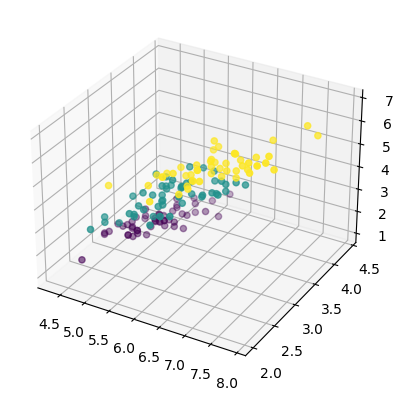

In [27]:
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:,2], c=y)

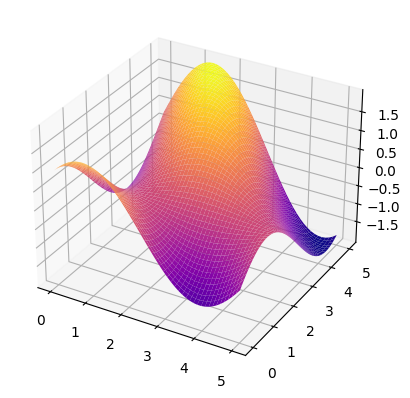

In [28]:
f = lambda x, y: np.sin(x) + np.cos(x+y)

X = np.linspace(0, 5, 50)
Y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
plt.show()

## 3. Histogrammes

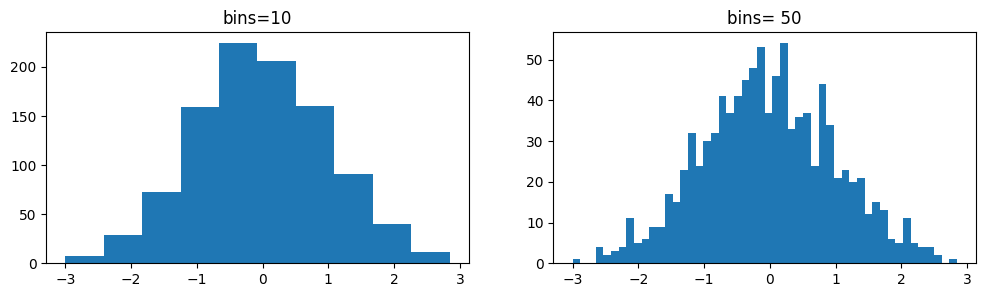

In [29]:
x = np.random.randn(1000)

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.hist(x, bins=10)
plt.title('bins=10')
plt.subplot(122)
plt.hist(x, bins=50)
plt.title('bins= 50')
plt.show()

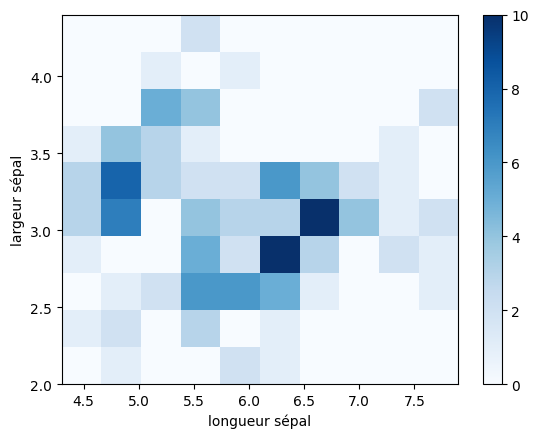

In [30]:
x = iris.data

plt.hist2d(x[:,0], x[:,1], cmap='Blues')
plt.xlabel('longueur sépal')
plt.ylabel('largeur sépal')
plt.colorbar()

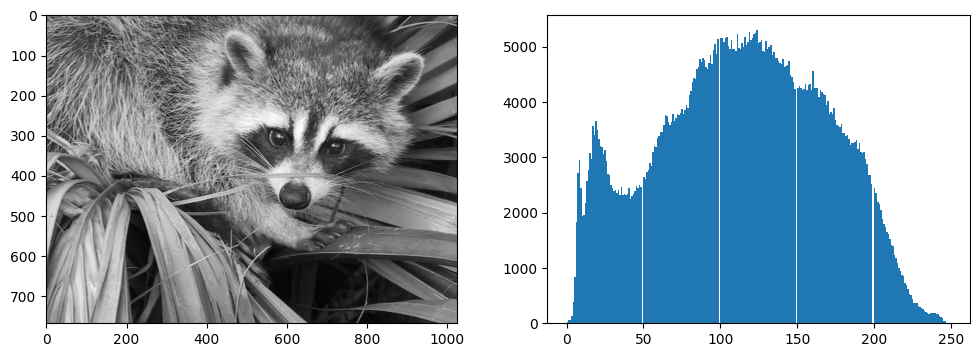

In [31]:
# histogramme d'une image
from scipy import misc
face = misc.face(gray=True)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(face, cmap='gray')
plt.subplot(122)
plt.hist(face.ravel(), bins=255)
plt.show()

## 4. Graphiques ContourPlot()

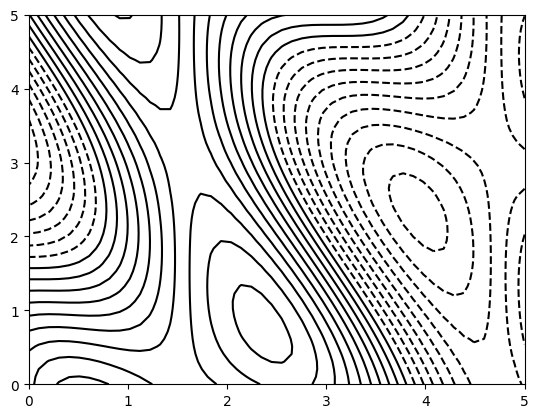

In [32]:
f = lambda x, y: np.sin(x) + np.cos(x+y)*np.cos(x)

X = np.linspace(0, 5, 50)
Y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

plt.contour(X, Y, Z, 20, colors='black')

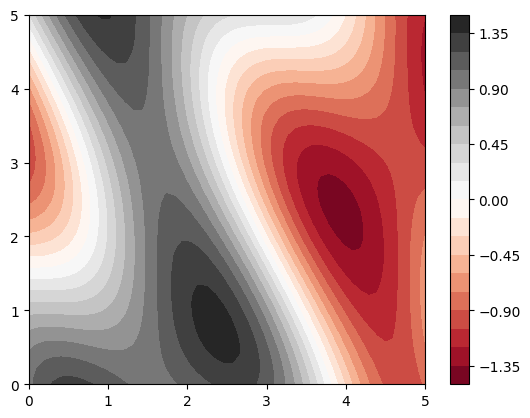

In [33]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
     

# 5. Imshow()

Text(0.5, 1.0, 'f(x, y) = sin(x) + cos(y)')

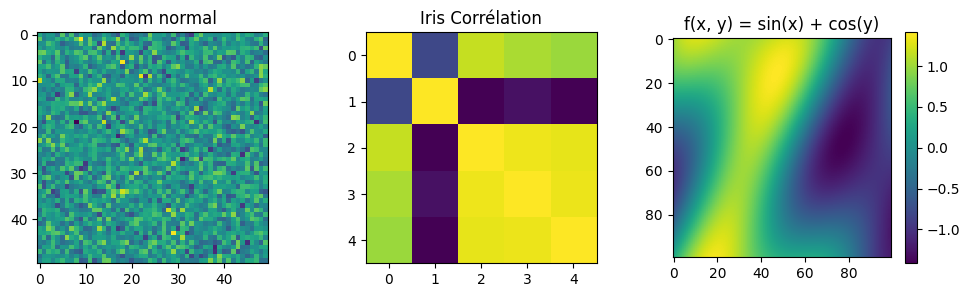

In [36]:
plt.figure(figsize=(12, 3))

# Simple graphique imshow()
X = np.random.randn(50, 50)

plt.subplot(131)
plt.imshow(X)
plt.title('random normal')

# Matrice de corrélation des iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


plt.subplot(132)
plt.imshow(np.corrcoef(X.T, y))
plt.title('Iris Corrélation')

# Matrice f(X, Y) = sin(X) + cos(Y)
X = np.linspace(0, 5, 100)
Y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(X, Y)

plt.subplot(133)
plt.imshow(f(X, Y))
plt.colorbar()
plt.title('f(x, y) = sin(x) + cos(y)')
     